•features - матрица, соответствующая обучающей выборке

•w_init - вектор начальных весов модели

•eta - шаг градиентного спуска (по умолчанию 0.001)

•max_iter - максимальное число итераций градиентного спуска (по умолчанию 100)

•max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию 1e-3)

•seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)

•verbose - флаг печати информации (например, для отладки, по умолчанию False)

In [1]:
import numpy as np
import pandas as pd
from time import time

from thbmodel.utils import timestamp, YEAR, MONTH,settings
from thbmodel.utils.arrayview import ArrayView, TimeseriesView

from thbmodel.prediction.models.fit_model import TSModel
from thbmodel.prediction.models.model_parameters import ModelParameters
from thbmodel.prediction.models.factor_management import FactorList
from thbmodel.prediction.models.preprocessing import load_slices

from thbmodel.prediction.models.prediction import factornames_trimmed
from thbmodel.prediction.models.parameters import factor_build_end
import thbmodel.prediction.models.St_gradient as sg 

In [2]:
av = ArrayView.from_file(settings.paths.join('racing_data_azd.av.bcolz'))
tsav = load_slices()

In [3]:
build_end =float(timestamp('2016-04-01'))
oos_start =float(timestamp('2017-05-01'))
pars = ModelParameters(av, build_end =build_end, oos_start =oos_start, depth=1, lmbd=10, verbose=False)

In [4]:
fl = FactorList.from_av(av, factornames_trimmed)
fl.preprocess(pars)
factors = fl.asmatrix()
print 'is1_start  ',(timestamp(av.start_time[pars.is1][0]))
print 'is1_end  ',(timestamp(av.start_time[pars.is1][-1]))
print 'oos_start  ',(timestamp(av.start_time[pars.oos][0]))
print 'oos_end  ',(timestamp(av.start_time[pars.oos][-1]))

is1_start   2016-04-01 12:40:00.000000
is1_end   2017-04-30 16:45:00.000000
oos_start   2017-05-01 12:30:00.000000
oos_end   2017-08-20 15:00:00.000000


In [5]:
import pandas as pd
pd.set_option('display.max_columns', 90)
n,m = factors.shape
col_names = ['f{}'.format(i) for i in range(1,n+1)]

df = sg.DF (pars.model_mask, factors, av, col_names, ['event_id', 'result'])
df['is1'] = pars.is1 [pars.model_mask]
df['is2'] = pars.is2 [pars.model_mask]
df['oos'] = pars.oos [pars.model_mask]


df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,event_id,result,is1,is2,oos
0,0.367198,-2.822814,1.042788,-1.449000,-0.399689,1.519560,1.120796,-0.903438,2.149808,0.454737,0.397418,2.018940,-0.041120,-1.864951,0.903440,-0.595091,-2.351100,0.791641,-0.371619,-0.134965,0.383271,-1.827844,-0.662651,1.423997,0.518412,0.633018,-0.217998,-0.046744,1.832861,0.362147,1.789398,0.713323,0.847637,2.197710,0.333612,0.992382,2.005222,1.745112,-2.169849,0.024419,0.516602,0.838355,-0.231825,0.510499,-0.818574,1.690850,1.153778,0.0,-0.178424,1.606775,1.276101,0.903439,-0.903432,1.539463,307976,4,True,True,False
1,0.367198,-2.822814,1.146508,-0.950907,0.134657,1.279091,0.709838,0.511180,1.163663,0.554670,0.589283,2.676868,-0.853920,-1.762160,-0.511180,0.355150,0.325790,-0.024739,0.462871,0.297558,1.503070,-1.925740,-0.642401,2.296713,-0.518494,1.678214,-0.325527,0.081803,-0.721549,3.691803,1.126171,1.576948,0.329637,0.138260,1.866920,1.105528,1.685527,1.745112,-1.926777,0.024419,-0.399449,0.838355,1.043211,0.510499,-0.881552,0.215314,0.760771,0.0,-0.103089,1.421764,0.382060,-0.511180,0.511188,-0.341251,307976,1,True,True,False
2,0.367198,-2.269686,1.109573,1.041469,-1.246235,0.959507,0.533713,-0.834292,2.054531,0.589805,0.781147,-0.425354,-0.308430,-1.495752,0.834292,-0.561211,0.570014,-1.385371,0.230456,0.295614,0.221700,-1.316387,-1.368199,0.486579,1.954420,0.373406,-0.280811,0.210350,0.824291,0.099820,0.924145,0.695130,0.329637,-2.094361,0.463911,1.114437,1.611524,1.745112,-1.271665,-0.100011,-0.118486,-1.065489,-0.231825,0.510499,2.544475,-0.108367,-0.777575,0.0,-0.034824,0.366740,0.442908,0.834292,-0.834286,0.687687,307976,2,True,True,False
3,0.367198,-2.082636,-0.546706,1.041469,-0.177928,0.807879,1.825297,0.377624,-0.891473,2.359050,0.690858,-1.025506,2.586447,-1.542717,-0.377623,0.483454,0.439499,-1.929624,-0.011781,0.218581,1.028220,-0.193052,-0.390140,-0.525911,0.543346,0.061765,-0.134161,0.210350,-1.481083,-1.201241,-0.343101,-0.052652,-0.188364,0.024540,-0.598031,-0.847758,1.648525,1.745112,-0.854125,-0.057719,-0.967518,-1.950998,-0.231825,0.510499,-0.705213,-0.063721,0.946241,0.0,0.028652,0.979326,3.985849,-0.377623,0.377629,1.750346,307976,5,True,True,False
4,0.367198,-1.620791,0.904502,1.041469,-0.645139,0.037615,-0.229496,-0.471971,1.330716,1.717160,0.167181,-0.232777,-0.308430,-0.513871,0.471972,-0.296116,0.195127,-1.385371,0.358433,0.311468,1.782793,-1.105682,-0.162607,-0.525911,1.667236,1.301977,-0.517036,0.210350,0.340718,4.356093,0.522335,1.517120,-0.188364,-1.785856,1.200810,0.854792,0.270584,1.745112,-0.640691,0.049978,-0.749274,-0.453683,-0.231825,0.510499,2.587987,-0.043631,1.434019,0.0,-0.145211,1.003482,0.699005,0.471972,-0.471966,0.365180,307976,8,True,True,False


In [6]:
import time
start = time.time()
df_train_t, winner_tr_t, t_len_tr = sg.DF_to_tensor(df.loc[df.is1.values,:], col_names)
df_test_t, winner_ts_t, t_len_ts = sg.DF_to_tensor(df.loc[df.oos.values,:], col_names)
end = time.time()
print 'DataFrame to tensors {}'.format(end -start)

DataFrame to tensors 27.4345068932


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import time

SGD_models =[]


for b_size in [10, 100, 500, 1000, 2500, 5000, 10000]:
    start = time.time()
    N_epoh = 12000/b_size +2
    SGD_models.append(sg.AdaMax(df.loc[df.is1.values,:], col_names, b_size =b_size, eta = 1e-3, N_epoh =N_epoh, \
                             moment1 = 0.9,  la = 0.7, moment2 =0.99, max_iter =100))
    end = time.time()
    print 'Time taken to stohastic gradient {}  b_size {}'.format(end - start, b_size)

Time taken to stohastic gradient 0.0628409385681  b_size 10
Time taken to stohastic gradient 0.277632951736  b_size 100
Time taken to stohastic gradient 1.18025803566  b_size 500
Time taken to stohastic gradient 2.42202401161  b_size 1000
Time taken to stohastic gradient 6.87433600426  b_size 2500
Time taken to stohastic gradient 12.5245909691  b_size 5000
Time taken to stohastic gradient 21.1632590294  b_size 10000


In [30]:
for mod in SGD_models:
    print mod[1].shape

(120201,)
(12201,)
(2601,)
(1401,)
(601,)
(401,)
(301,)


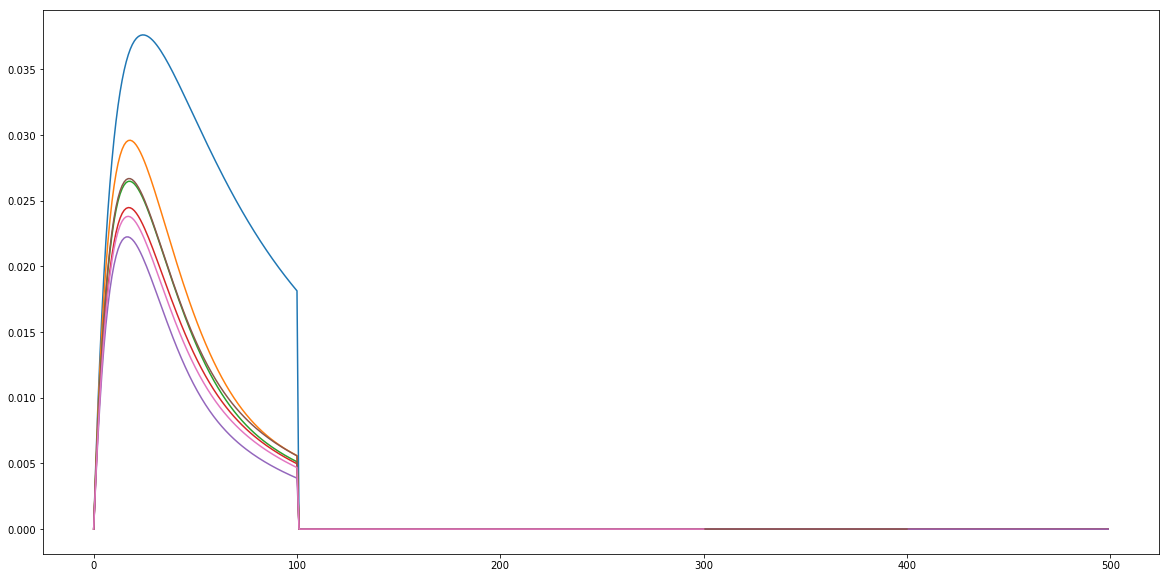

0.0181404029003
0.00559255341444
0.00512395359257
0.00497502432339
0.0038780359921
0.00557684967689
0.00468253471896


In [42]:
plt.figure(figsize=(20, 10))
for mod in SGD_models:
    plt.plot(mod[1][:500])
plt.show()
for mod in SGD_models:
    print mod[1][mod[1] >0][-1]

In [13]:
for mod in SGD_models:
    w0 = mod[0] # return to original shape
    start = time.time()
    likelihood = sg.LL_f (df_train_t, winner_tr_t, w0)
    end = time.time()
    print 'count ll for train data {} by AdaMax'.format(end -start)
    print likelihood

count ll for train data 0.0460441112518 by AdaMax
-2.05871421
count ll for train data 0.0466871261597 by AdaMax
-1.99105251181
count ll for train data 0.039764881134 by AdaMax
-1.97467522787
count ll for train data 0.0387711524963 by AdaMax
-1.97779982283
count ll for train data 0.0389850139618 by AdaMax
-1.97514464024
count ll for train data 0.039626121521 by AdaMax
-1.97249398996
count ll for train data 0.0417020320892 by AdaMax
-1.97398117332


In [16]:
import time

SGD_models =[]
la_list = [0.5, 1., 2., 4., 7., 10.]
mom2_list = [0.97, 0.975, 0.98, 0.985, 0.99]

for mom in mom2_list:
    start = time.time()
    #N_epoh = 12000/b_size +2
    SGD_models.append(sg.AdaMax(df.loc[df.is1.values,:], col_names, b_size =1000, eta = 1e-4, N_epoh =14, \
                             moment1 = 0.98,  la = 0.8, moment2 =mom, max_iter =100, verbose=False))
    end = time.time()
    print 'Time taken to stohastic gradient {}  moment2 {}'.format(end - start, mom)

Time taken to stohastic gradient 1.43897604942  moment2 0.97
Time taken to stohastic gradient 1.43047308922  moment2 0.975
Time taken to stohastic gradient 1.50558519363  moment2 0.98
Time taken to stohastic gradient 1.51544904709  moment2 0.985
Time taken to stohastic gradient 1.46837186813  moment2 0.99


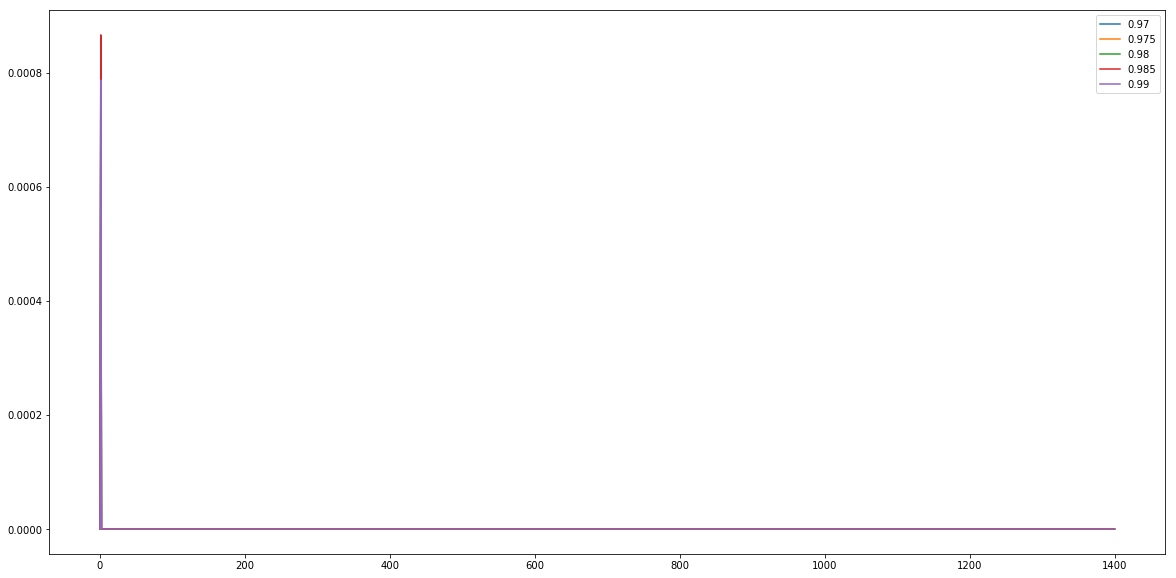

0.000764933447546
0.000694613042005
0.000811670362992
0.000865901675551
0.00078672123244


In [17]:
plt.figure(figsize=(20, 10))
for mod, mom in zip(SGD_models, mom2_list):
    plt.plot(mod[1], label =str(mom))
plt.legend()
plt.show()
for mod in SGD_models:
    print mod[1][mod[1] >0][-1]

In [18]:
for mod in SGD_models:
    w0 = mod[0] # return to original shape
    start = time.time()
    likelihood = sg.LL_f (df_train_t, winner_tr_t, w0)
    end = time.time()
    print 'count ll for train data {} by AdaMax'.format(end -start)
    print likelihood

count ll for train data 0.0420310497284 by AdaMax
-2.26373546233
count ll for train data 0.0461490154266 by AdaMax
-2.22239041818
count ll for train data 0.0415480136871 by AdaMax
-2.27657894598
count ll for train data 0.0406939983368 by AdaMax
-2.27031488269
count ll for train data 0.0398180484772 by AdaMax
-2.28183737852


In [19]:
for mod in SGD_models:
    w0 = mod[0] # return to original shape
    start = time.time()
    likelihood = sg.LL_f (df_test_t, winner_ts_t, w0)
    end = time.time()
    print 'count ll for test data {} by AdaMax'.format(end -start)
    print likelihood

count ll for test data 0.0130178928375 by AdaMax
-2.26453553365
count ll for test data 0.0129542350769 by AdaMax
-2.21983790471
count ll for test data 0.0127220153809 by AdaMax
-2.27457020865
count ll for test data 0.0173971652985 by AdaMax
-2.26834282315
count ll for test data 0.0137221813202 by AdaMax
-2.27789528845


In [30]:
import time

SGD_models =[]
la_list = [0.5, 1., 2., 4., 7., 10.]
mom2_list = [0.97, 0.975, 0.98, 0.985, 0.99]

for mom in mom2_list:
    start = time.time()
    #N_epoh = 12000/b_size +2
    SGD_models.append(sg.Adam(df.loc[df.is1.values,:], col_names, b_size =2500, eta = 1e-4, N_epoh =7, \
                             moment1 = 0.97,  la = 0.8, moment2 =mom, max_iter =100, verbose=False))
    end = time.time()
    print 'Time taken to stohastic gradient {}  moment2 {}'.format(end - start, mom)

SGD covergence 120
SGD covergence 201
SGD covergence 301
SGD covergence 401
SGD covergence 501
SGD covergence 601
Time taken to stohastic gradient 25.4124238491  moment2 0.97
SGD covergence 94
SGD covergence 101
SGD covergence 201
SGD covergence 301
SGD covergence 401
SGD covergence 501
SGD covergence 601
Time taken to stohastic gradient 26.1545050144  moment2 0.975
SGD covergence 92
SGD covergence 101
SGD covergence 201
SGD covergence 301
SGD covergence 401
SGD covergence 501
SGD covergence 601
Time taken to stohastic gradient 26.0107879639  moment2 0.98
SGD covergence 100
SGD covergence 101
SGD covergence 201
SGD covergence 301
SGD covergence 401
SGD covergence 501
SGD covergence 601
Time taken to stohastic gradient 24.9049859047  moment2 0.985
SGD covergence 94
SGD covergence 101
SGD covergence 201
SGD covergence 301
SGD covergence 401
SGD covergence 501
SGD covergence 601
Time taken to stohastic gradient 24.5841519833  moment2 0.99


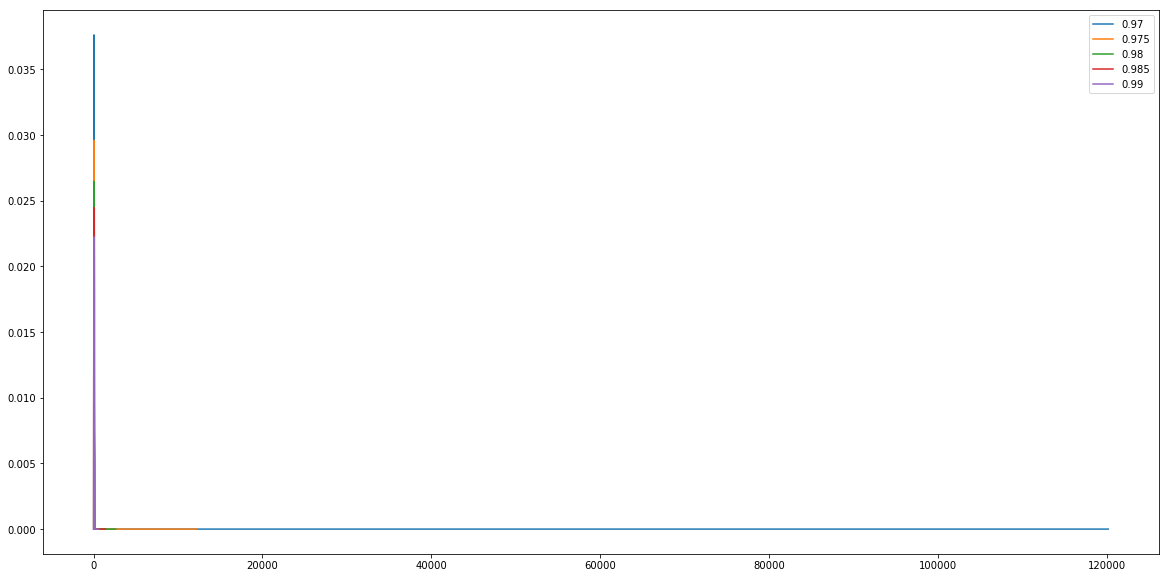

0.0181404029003
0.00559255341444
0.00512395359257
0.00497502432339
0.0038780359921
0.00557684967689
0.00468253471896


In [39]:
plt.figure(figsize=(20, 10))
for mod, mom in zip(SGD_models, mom2_list):
    plt.plot(mod[1], label =str(mom))
plt.legend()
plt.show()
for mod in SGD_models:
    print mod[1][mod[1] >0][-1]

In [40]:
for mod in SGD_models:
    w0 = mod[0] # return to original shape
    start = time.time()
    likelihood = sg.LL_f (df_train_t, winner_tr_t, w0)
    end = time.time()
    print 'count ll for train data {} by Adam'.format(end -start)
    print likelihood

count ll for train data 0.039614200592 by Adam
-2.19009086791
count ll for train data 0.0438771247864 by Adam
-2.00575852846
count ll for train data 0.0399332046509 by Adam
-1.97851793262
count ll for train data 0.0400469303131 by Adam
-1.9770807348
count ll for train data 0.0418491363525 by Adam
-1.97043402012
count ll for train data 0.0431039333344 by Adam
-1.97884837842
count ll for train data 0.0476570129395 by Adam
-1.97338331196


In [41]:
for mod in SGD_models:
    w0 = mod[0] # return to original shape
    start = time.time()
    likelihood = sg.LL_f (df_test_t, winner_ts_t, w0)
    end = time.time()
    print 'count ll for test data {} by Adam'.format(end -start)
    print likelihood

count ll for test data 0.0146980285645 by Adam
-2.19765833625
count ll for test data 0.0137798786163 by Adam
-2.01689580016
count ll for test data 0.0140619277954 by Adam
-1.99255298456
count ll for test data 0.017669916153 by Adam
-1.9869032057
count ll for test data 0.0144109725952 by Adam
-1.98287066595
count ll for test data 0.0143978595734 by Adam
-1.99195442994
count ll for test data 0.0144469738007 by Adam
-1.98706474298


In [ ]:
for i in range(10):
    
    W1 = np.random.normal(loc =w0, scale =1e-2, size =(len(col_names)))
    print 'train  ',LL_f (df_train_t, winner_tr_t, W1)
    print 'test  ',LL_f (df_test_t, winner_ts_t, W1)